## Importação de bibliotecas

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('ticks')

## Leitura do Dataset

In [2]:
df = pd.read_csv('CAGEDMOV202005.csv',encoding = 'utf-8', delimiter=";", low_memory=False)

In [3]:
#caso o data frame seja lido em iso-8859-1
'''
df = df.rename(columns = {'competÃªncia': 'competência', 
'regiÃ£o': 'região',
'municÃ­pio': 'município',
'seÃ§Ã£o': 'seção',
'saldomovimentaÃ§Ã£o': 'saldomovimentação',
'cbo2002ocupaÃ§Ã£o' : 'cbo2002ocupação',
'graudeinstruÃ§Ã£o': 'graudeinstrução',
'raÃ§acor': 'raçacor',
'tipomovimentaÃ§Ã£o': 'tipomovimentação',
'tipodedeficiÃªncia': 'tipodedeficiência',
'salÃ¡rio': 'salário'}, inplace = False)
'''

"\ndf = df.rename(columns = {'competÃªncia': 'competência', \n'regiÃ£o': 'região',\n'municÃ\xadpio': 'município',\n'seÃ§Ã£o': 'seção',\n'saldomovimentaÃ§Ã£o': 'saldomovimentação',\n'cbo2002ocupaÃ§Ã£o' : 'cbo2002ocupação',\n'graudeinstruÃ§Ã£o': 'graudeinstrução',\n'raÃ§acor': 'raçacor',\n'tipomovimentaÃ§Ã£o': 'tipomovimentação',\n'tipodedeficiÃªncia': 'tipodedeficiência',\n'salÃ¡rio': 'salário'}, inplace = False)\n"

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884187 entries, 0 to 1884186
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   competência          int64  
 1   região               int64  
 2   uf                   int64  
 3   município            int64  
 4   seção                object 
 5   subclasse            int64  
 6   saldomovimentação    int64  
 7   cbo2002ocupação      int64  
 8   categoria            int64  
 9   graudeinstrução      int64  
 10  idade                float64
 11  horascontratuais     int64  
 12  raçacor              int64  
 13  sexo                 int64  
 14  tipoempregador       int64  
 15  tipoestabelecimento  int64  
 16  tipomovimentação     int64  
 17  tipodedeficiência    int64  
 18  indtrabintermitente  int64  
 19  indtrabparcial       int64  
 20  salário              float64
 21  tamestabjan          int64  
 22  indicadoraprendiz    int64  
 23  fonte                int64  
dty

## Data cleaning

In [5]:
df.isnull().sum()

competência             0
região                  0
uf                      0
município               0
seção                   0
subclasse               0
saldomovimentação       0
cbo2002ocupação         0
categoria               0
graudeinstrução         0
idade                   3
horascontratuais        0
raçacor                 0
sexo                    0
tipoempregador          0
tipoestabelecimento     0
tipomovimentação        0
tipodedeficiência       0
indtrabintermitente     0
indtrabparcial          0
salário                19
tamestabjan             0
indicadoraprendiz       0
fonte                   0
dtype: int64

### Como poucos valores estão nulos, vamos excluir estes registros, pois acreditos que não vai influenciar na análise

In [6]:
df = df.dropna()

In [7]:
df['salário']=df['salário'].apply(lambda x :  str(x).replace(',','.'))
df['salário']=df['salário'].apply(lambda x :  str(x).replace('nan','0'))
df['salário']=pd.to_numeric(df['salário'], downcast="float")

In [8]:
def categorizarClasseSocial(x):
    #try:
        #x=float(x)

        if x<2200:
            return 'E'
        elif x<4400:
            return 'D'
        elif x<11000:
            return 'C'
        elif x<22000:
            return 'B'
        else:
            return 'A'

#    except:
 #       print("caca: "+x)

In [9]:
df['admitidos/desligados'] = df['tipomovimentação'].apply(lambda x: "Admitido" if x==10 or x==20 or x==25 or x==35 or x==70 else "Desligado")

In [10]:
Raca = {1: 'BRANCA',2: 'PRETA',3: 'PARDA', 4: 'AMARELA',5 : 'INDIGENA',6:'NÃO INFORMADA',  9: 'NAO IDENTIFICADO'}
Sexo = {1: 'MASCULINO',3 :'FEMININO', 9: 'NAO IDENTIFICADO'}
AdmDem = {1: 'ADMISSÃO', 2: 'DESLIGAMENTO'}
TipoMovDesagregado = {
10:'Admissão por Primeiro Emprego',
20:'Admissão por Reemprego', 
25:'Admissão por contrato trabalho prazo determinado',
31:'Desligamento por Demissão sem Justa Causa', 
32:'Desligamento por Demissão com Justa Causa', 
33:'Culpa Recíproca',
35:'Admissão por Reintegraçao', 
40:'Desligamento a Pedido',
43:'Término contrato trabalho prazo determinado',
45:'Desligamento por Término de Contrato',
50:'Desligamento por Aposentadoria', 
60:'Desligamento por morte',
70:'Admissão por Transferência', 
80:'Desligamento por Transferência', 
90:'Desliamento por Acordo Empregado e Empregador',
98:'Desligamento de Tipo Ignorado',
99:'Não Identificado'}

In [11]:
df['raçacor'] = df['raçacor'].map(Raca)
df['sexo'] = df['sexo'].map(Sexo)
df['tipomovimentação'] = df['tipomovimentação'].map(TipoMovDesagregado)

In [12]:
df['classe social'] = df['salário'].apply(lambda x: categorizarClasseSocial(x))

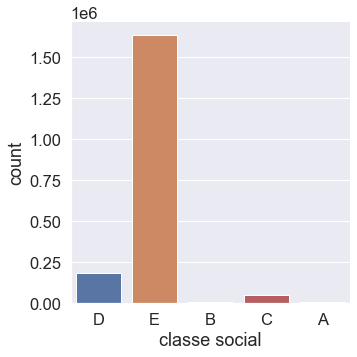

In [59]:
sns.catplot(x="classe social", kind="count", data=df)

In [14]:
def categorizarFaixaEtaria(x):
        if x<20:
            return "Adolescência"
        elif x<26:
            return "Pós-adolescência"
        elif x<40:
            return "Adultidade"
        elif x<65:
            return "Meia-idade"
        elif x<80:
            return "Terceira idade"
        else:
            return "Quarta Idade"

In [15]:
df['faixa Etária'] = df['idade'].apply(lambda x: categorizarFaixaEtaria(x))

### Criar coluna admitidos/desligados apartir dos dados de tipomovimentação

### Calcular total admitido e total desligado

In [16]:
total = df['admitidos/desligados'].count()

### Cria um array só com admitidos

In [17]:
totalAdmitidoArray = df[df['admitidos/desligados'] == "Admitido"]
totalAdmitido = totalAdmitidoArray['admitidos/desligados'].count()

### Cria um array só com desligados

In [18]:
totalDesligadoArray = df[df['admitidos/desligados'] == "Desligado"]
totalDesligado = total - totalAdmitido

# Tópico 1 - Qual foi o índice de pessoas empregadas e desempregadas em certo período, categorizadas por:
    - Gênero 
    - Classe social 
    - Faixa Etária 
    - Nível de escolaridade 
    - Setores (Agronegócio, Indústria, Comércio, etc...) 

# Começa a calcular os items pedidos

## Indice sexo

### Admitidos

In [19]:
TotalAdmitidoFem = (totalAdmitidoArray[totalAdmitidoArray['sexo']==1])['admitidos/desligados'].count()
TotalAdmitidoMasc = totalAdmitido - TotalAdmitidoFem
porcentagemAdmitidoFem = ((TotalAdmitidoFem/totalAdmitido)*100).astype(int)
porcentagemAdmitidoMasc = 100-porcentagemAdmitidoFem
f'Porcentagem Admitido feminino: {porcentagemAdmitidoFem}%  ||  Porcentagem Admitido Masculino:  {porcentagemAdmitidoMasc}%'

'Porcentagem Admitido feminino: 0%  ||  Porcentagem Admitido Masculino:  100%'

In [20]:
#sns.catplot(x="sexo", y="TotalAdmitidoFem",  palette="ch:.25",kind="bar", data=df)

### Desligados

In [21]:
TotalDesligadoFem = (totalDesligadoArray[totalDesligadoArray['sexo']==1])['admitidos/desligados'].count()
TotalDesligadoMasc = totalDesligado - TotalDesligadoFem
porcentagemDesligadoFem = ((TotalDesligadoFem/totalDesligado)*100).astype(int)
porcentagemDesligadoMasc = 100-porcentagemDesligadoFem
f'Porcentagem Desligado feminino: {porcentagemDesligadoFem}%  ||  Porcentagem Desligado Masculino: {porcentagemDesligadoMasc}%'

'Porcentagem Desligado feminino: 0%  ||  Porcentagem Desligado Masculino: 100%'

## Indice Classe social

In [22]:
classes=['A','B','C','D','E']

### Admitidos

In [23]:
for x in classes: 
    totalAdmitidoClasse = (totalAdmitidoArray[totalAdmitidoArray['classe social']==x])['admitidos/desligados'].count()
    porcentagemAdmitido = ((totalAdmitidoClasse/totalAdmitido)*100).astype(int)
    print(f'Porcentagem Admitidos classe {x}: {porcentagemAdmitido}%')

Porcentagem Admitidos classe A: 0%
Porcentagem Admitidos classe B: 0%
Porcentagem Admitidos classe C: 2%
Porcentagem Admitidos classe D: 8%
Porcentagem Admitidos classe E: 87%


### Desligados

In [24]:
for x in classes: 
    totalDesligadoClasse = (totalDesligadoArray[totalDesligadoArray['classe social']==x])['admitidos/desligados'].count()
    porcentagemDesligado = ((totalDesligadoClasse/totalDesligado)*100).astype(int)
    print(f'Porcentagem Desligado classe {x}: {porcentagemDesligado}%')

Porcentagem Desligado classe A: 0%
Porcentagem Desligado classe B: 0%
Porcentagem Desligado classe C: 2%
Porcentagem Desligado classe D: 10%
Porcentagem Desligado classe E: 86%


## Indice faixa etaria

### Classificação faixa etaria
    15 a 20 anos: Adolescência
    20 a 26 anos: Pós-adolescência
    26 a 40 anos: Adultidade
    40 a 65 anos: Meia-idade
    65 a 80 anos: Terceira idade
    mais que 80 anos: Quarta Idade

In [25]:
faixaEtarias = {
    "Adolescência":"15 a 20 anos",
    "Pós-adolescência":"20 a 26 anos",
    "Adultidade":"26 a 40 anos",
    "Meia-idade":"40 a 65 anos",
    "Terceira idade":"65 a 80 anos",
    "Quarta Idade":"mais que 80 anos"
    }

### Admitidos

In [26]:
for x,y in faixaEtarias.items():
    totalAdmitidoFaixaEtaria = (totalAdmitidoArray[totalAdmitidoArray['faixa Etária']==x])['admitidos/desligados'].count()
    porcentagemAdmitido = ((totalAdmitidoFaixaEtaria/totalAdmitido)*100).astype(int)
    print(f'Porcentagem Admitidos {x} ({y}): {porcentagemAdmitido}%')

Porcentagem Admitidos Adolescência (15 a 20 anos): 8%
Porcentagem Admitidos Pós-adolescência (20 a 26 anos): 23%
Porcentagem Admitidos Adultidade (26 a 40 anos): 44%
Porcentagem Admitidos Meia-idade (40 a 65 anos): 23%
Porcentagem Admitidos Terceira idade (65 a 80 anos): 0%
Porcentagem Admitidos Quarta Idade (mais que 80 anos): 0%


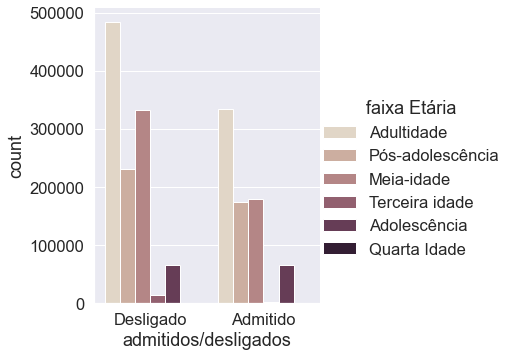

In [57]:
sns.catplot(x="admitidos/desligados",hue="faixa Etária", kind="count", palette="ch:.25", data=df)

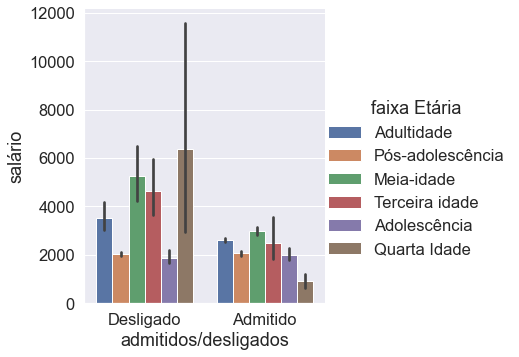

In [58]:
sns.catplot(x="admitidos/desligados", y="salário", hue="faixa Etária", kind="bar", data=df)

### Desligados

In [29]:
for x,y in faixaEtarias.items():
    totalDesligadoFaixaEtaria = (totalDesligadoArray[totalDesligadoArray['faixa Etária']==x])['admitidos/desligados'].count()
    porcentagemDesligado = ((totalDesligadoFaixaEtaria/totalDesligado)*100).astype(int)
    print(f'Porcentagem Desligado {x} ({y}): {porcentagemDesligado}%')

Porcentagem Desligado Adolescência (15 a 20 anos): 5%
Porcentagem Desligado Pós-adolescência (20 a 26 anos): 20%
Porcentagem Desligado Adultidade (26 a 40 anos): 42%
Porcentagem Desligado Meia-idade (40 a 65 anos): 29%
Porcentagem Desligado Terceira idade (65 a 80 anos): 1%
Porcentagem Desligado Quarta Idade (mais que 80 anos): 0%


## Indice Grau Instrução

In [30]:
grauInstrução = {
    1:"Analfabeto",
    2:"Até 5ª Incompleto",
    3:"5ª Completo Fundamental",
    4:"6ª a 9ª Fundamental",
    5:"Fundamental Completo",
    6:"Médio Incompleto",
    7:"Médio Completo",
    8:"Superior Incompleto",
    9:"Superior Completo",
    10:"Mestrado",
    11:"Doutorado",
    80:"Pós-Graduação completa",
    99:"Não Identificado"
}

### Admitidos

In [31]:
for x,y in grauInstrução.items():
    totalAdmitidoGrauInstrução = (totalAdmitidoArray[totalAdmitidoArray['graudeinstrução']==x])['admitidos/desligados'].count()
    porcentagemAdmitido = ((totalAdmitidoGrauInstrução/totalAdmitido)*100).astype(int)
    print(f'Porcentagem Admitidos {y}: {porcentagemAdmitido}%')

Porcentagem Admitidos Analfabeto: 0%
Porcentagem Admitidos Até 5ª Incompleto: 3%
Porcentagem Admitidos 5ª Completo Fundamental: 2%
Porcentagem Admitidos 6ª a 9ª Fundamental: 5%
Porcentagem Admitidos Fundamental Completo: 8%
Porcentagem Admitidos Médio Incompleto: 6%
Porcentagem Admitidos Médio Completo: 59%
Porcentagem Admitidos Superior Incompleto: 3%
Porcentagem Admitidos Superior Completo: 8%
Porcentagem Admitidos Mestrado: 0%
Porcentagem Admitidos Doutorado: 0%
Porcentagem Admitidos Pós-Graduação completa: 0%
Porcentagem Admitidos Não Identificado: 0%


### Desligados

In [32]:
for x,y in grauInstrução.items():
    totalDesligadoGrauInstrução = (totalDesligadoArray[totalDesligadoArray['graudeinstrução']==x])['admitidos/desligados'].count()
    porcentagemDesligado = ((totalDesligadoGrauInstrução/totalDesligado)*100).astype(int)
    print(f'Porcentagem Desligado {y}: {porcentagemDesligado}%')

Porcentagem Desligado Analfabeto: 0%
Porcentagem Desligado Até 5ª Incompleto: 2%
Porcentagem Desligado 5ª Completo Fundamental: 2%
Porcentagem Desligado 6ª a 9ª Fundamental: 6%
Porcentagem Desligado Fundamental Completo: 9%
Porcentagem Desligado Médio Incompleto: 8%
Porcentagem Desligado Médio Completo: 57%
Porcentagem Desligado Superior Incompleto: 3%
Porcentagem Desligado Superior Completo: 8%
Porcentagem Desligado Mestrado: 0%
Porcentagem Desligado Doutorado: 0%
Porcentagem Desligado Pós-Graduação completa: 0%
Porcentagem Desligado Não Identificado: 0%


In [33]:
df['graudeinstrução'] = df['graudeinstrução'].map(grauInstrução)

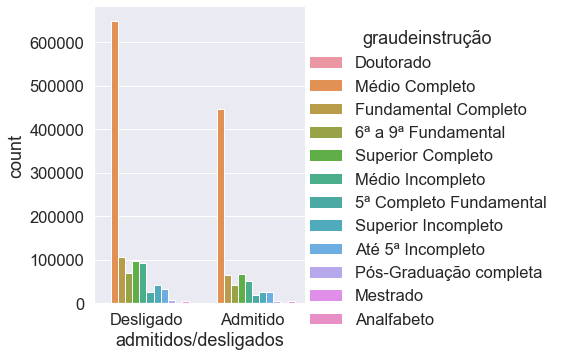

In [55]:
sns.catplot(x="admitidos/desligados",hue="graudeinstrução", kind="count", data=df)

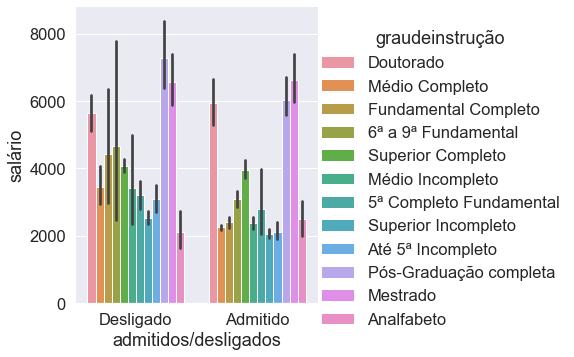

In [56]:
sns.catplot(x="admitidos/desligados", y="salário", hue="graudeinstrução", kind="bar", data=df)

## Indice Setores

In [36]:
setores ={
    "A":"Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura",
    "B":"Indústrias Extrativas",
    "C":"Indústrias de Transformação",
    "D":"Eletricidade e Gás",
    "E":"Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação",
    "F":"Construção",
    "G":"Comércio, Reparação de Veículos Automotores e Motocicletas",
    "H":"Transporte, Armazenagem e Correio",
    "I":"Alojamento e Alimentação",
    "J":"Informação e Comunicação",
    "K":"Atividades Financeiras, de Seguros e Serviços Relacionados",
    "L":"Atividades Imobiliárias",
    "M":"Atividades Profissionais, Científicas e Técnicas",
    "N":"Atividades Administrativas e Serviços Complementares",
    "O":"Administração Pública, Defesa e Seguridade Social",
    "P":"Educação",
    "Q":"Saúde Humana e Serviços Sociais",
    "R":"Artes, Cultura, Esporte e Recreação",
    "S":"Outras Atividades de Serviços",
    "T":"Serviços Domésticos",
    "U":"Organismos Internacionais e Outras Instituições Extraterritoriais",
    "Z":"Não identificado"
}

In [60]:
df['seção'].sample(10)

843237                                            Construção
898854                       Saúde Humana e Serviços Sociais
141977     Atividades Administrativas e Serviços Compleme...
1577464                          Indústrias de Transformação
1257694                                           Construção
1296540                      Saúde Humana e Serviços Sociais
289657     Comércio, Reparação de Veículos Automotores e ...
342957     Comércio, Reparação de Veículos Automotores e ...
751601                           Indústrias de Transformação
1246493    Atividades Administrativas e Serviços Compleme...
Name: seção, dtype: object

### Admitidos

In [40]:
df['seção']= df['seção'].map(setores)

<AxesSubplot:xlabel='count', ylabel='seção'>

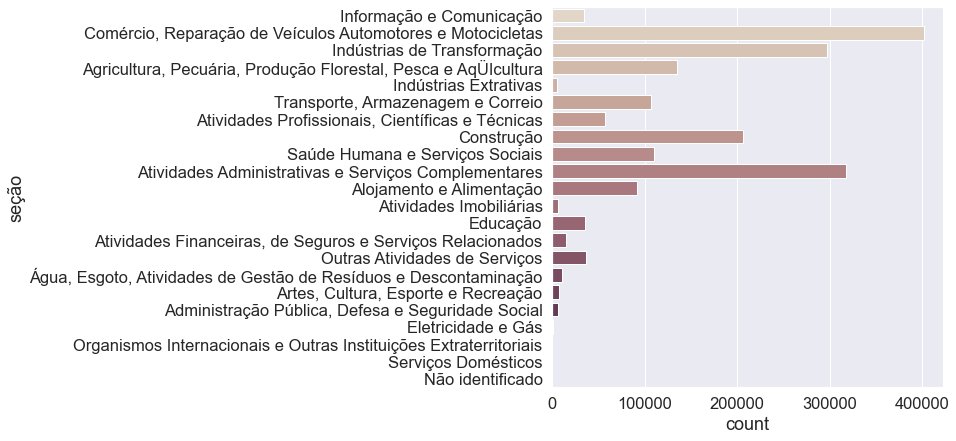

In [61]:
ax = plt.subplots(figsize=(7, 7))
sns.countplot(y="seção", data=df, palette="ch:.25")

In [38]:
for x,y in setores.items():
    totalAdmitidoSetores = (totalAdmitidoArray[totalAdmitidoArray['seção']==x])['admitidos/desligados'].count()
    porcentagemAdmitido = ((totalAdmitidoSetores/totalAdmitido)*100).astype(int)
    print(f'Porcentagem Admitidos do setor: {y}: {porcentagemAdmitido}%')

Porcentagem Admitidos do setor: Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura: 9%
Porcentagem Admitidos do setor: Indústrias Extrativas: 0%
Porcentagem Admitidos do setor: Indústrias de Transformação: 12%
Porcentagem Admitidos do setor: Eletricidade e Gás: 0%
Porcentagem Admitidos do setor: Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação: 0%
Porcentagem Admitidos do setor: Construção: 12%
Porcentagem Admitidos do setor: Comércio, Reparação de Veículos Automotores e Motocicletas: 20%
Porcentagem Admitidos do setor: Transporte, Armazenagem e Correio: 5%
Porcentagem Admitidos do setor: Alojamento e Alimentação: 2%
Porcentagem Admitidos do setor: Informação e Comunicação: 1%
Porcentagem Admitidos do setor: Atividades Financeiras, de Seguros e Serviços Relacionados: 0%
Porcentagem Admitidos do setor: Atividades Imobiliárias: 0%
Porcentagem Admitidos do setor: Atividades Profissionais, Científicas e Técnicas: 3%
Porcentagem Admitidos do setor: Atividades Adm

### Desligados

In [39]:
for x,y in setores.items():
    totalDesligadoSetores = (totalDesligadoArray[totalDesligadoArray['seção']==x])['admitidos/desligados'].count()
    porcentagemDesligado = ((totalDesligadoSetores/totalDesligado)*100).astype(int)
    print(f'Porcentagem Desligado do setor: {y}: {porcentagemDesligado}%')

Porcentagem Desligado do setor: Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura: 5%
Porcentagem Desligado do setor: Indústrias Extrativas: 0%
Porcentagem Desligado do setor: Indústrias de Transformação: 17%
Porcentagem Desligado do setor: Eletricidade e Gás: 0%
Porcentagem Desligado do setor: Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação: 0%
Porcentagem Desligado do setor: Construção: 10%
Porcentagem Desligado do setor: Comércio, Reparação de Veículos Automotores e Motocicletas: 22%
Porcentagem Desligado do setor: Transporte, Armazenagem e Correio: 6%
Porcentagem Desligado do setor: Alojamento e Alimentação: 6%
Porcentagem Desligado do setor: Informação e Comunicação: 1%
Porcentagem Desligado do setor: Atividades Financeiras, de Seguros e Serviços Relacionados: 0%
Porcentagem Desligado do setor: Atividades Imobiliárias: 0%
Porcentagem Desligado do setor: Atividades Profissionais, Científicas e Técnicas: 3%
Porcentagem Desligado do setor: Atividades Adm

# Tópico 2

# Tópico 3 

# Tópico 4 

In [41]:
df.groupby(by='sexo')['idade'].mean()

sexo
FEMININO     33.010748
MASCULINO    34.066039
Name: idade, dtype: float64

In [42]:
df.groupby(by='sexo')['salário'].mean()
df.groupby(by='sexo')['salário'].max()

sexo
FEMININO     39336220.0
MASCULINO    91960000.0
Name: salário, dtype: float32

In [43]:
df['sexo'].value_counts()

MASCULINO    1192434
FEMININO      691731
Name: sexo, dtype: int64

<Figure size 720x360 with 0 Axes>

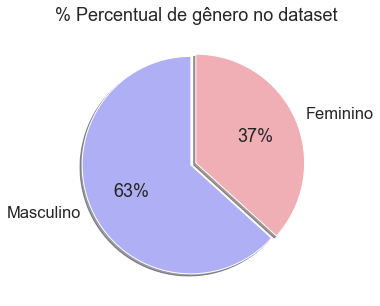

In [44]:
fig = plt.figure(figsize=(10, 5))
male_only = df[df['sexo'] == 'MASCULINO']
female_only = df[df['sexo'] == 'FEMININO']


fig = plt.figure(figsize=(5, 5))

colors = ['#AFAFF5', '#EFAFB5']
labels = ['Masculino', 'Feminino']
sizes = [len(male_only), len(female_only)]
explode = (0.05, 0)
sns.set(font_scale=1.5)
ax = plt.pie(sizes, labels=labels, explode=explode, colors=colors, shadow=True, startangle=90, autopct='%1.f%%')

plt.title('% Percentual de gênero no dataset')
plt.show()

## Média salarial por raça/cor

In [45]:
df.groupby(by='raçacor')['salário'].mean()

raçacor
AMARELA             2563.968750
BRANCA              3994.366211
INDIGENA            2067.998779
NAO IDENTIFICADO    1587.268677
NÃO INFORMADA       2980.351807
PARDA               2473.577393
PRETA               2864.746094
Name: salário, dtype: float32

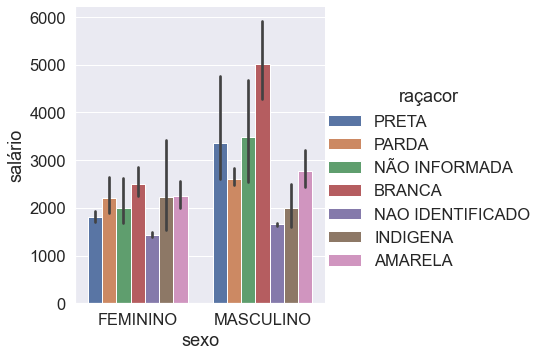

In [46]:
sns.catplot(x="sexo", y="salário", hue="raçacor", kind="bar", data=df)

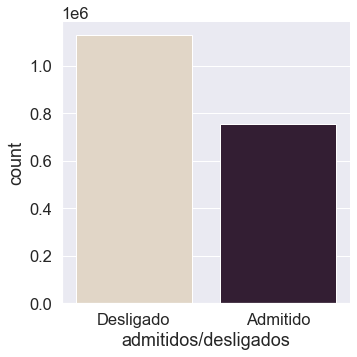

In [47]:
sns.catplot(x="admitidos/desligados", kind="count", palette="ch:.25", data=df)

In [48]:
df['tipomovimentação'].value_counts()

Desligamento por Demissão sem Justa Causa           777560
Admissão por Reemprego                              709166
Desligamento a Pedido                               154289
Término contrato trabalho prazo determinado         152333
Admissão por Primeiro Emprego                        42574
Desligamento por Demissão com Justa Causa            12588
Desliamento por Acordo Empregado e Empregador        10743
Desligamento por Término de Contrato                  8088
Desligamento por morte                                6432
Não Identificado                                      3564
Admissão por contrato trabalho prazo determinado      2852
Culpa Recíproca                                       1723
Admissão por Reintegraçao                             1542
Desligamento por Aposentadoria                         621
Desligamento de Tipo Ignorado                           90
Name: tipomovimentação, dtype: int64

In [49]:
df[df['admitidos/desligados'] == 'Desligado']['tipomovimentação'].value_counts()

Desligamento por Demissão sem Justa Causa        777560
Desligamento a Pedido                            154289
Término contrato trabalho prazo determinado      152333
Desligamento por Demissão com Justa Causa         12588
Desliamento por Acordo Empregado e Empregador     10743
Desligamento por Término de Contrato               8088
Desligamento por morte                             6432
Não Identificado                                   3564
Culpa Recíproca                                    1723
Desligamento por Aposentadoria                      621
Desligamento de Tipo Ignorado                        90
Name: tipomovimentação, dtype: int64

<AxesSubplot:xlabel='count', ylabel='tipomovimentação'>

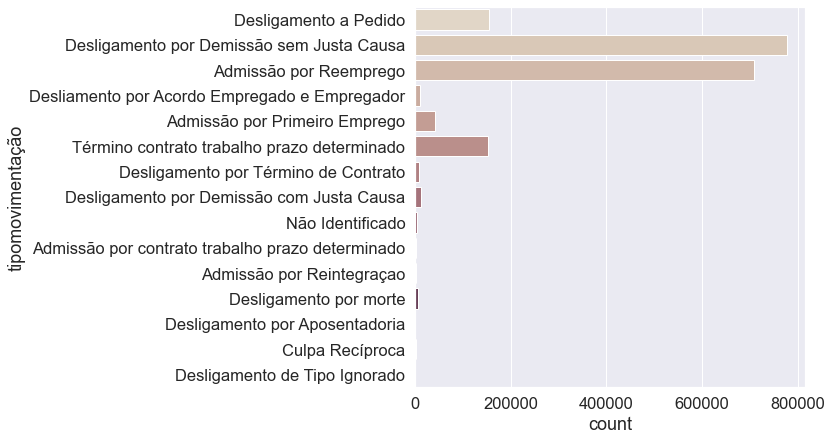

In [50]:
ax = plt.subplots(figsize=(7, 7))
sns.countplot(y="tipomovimentação", data=df, palette="ch:.25")

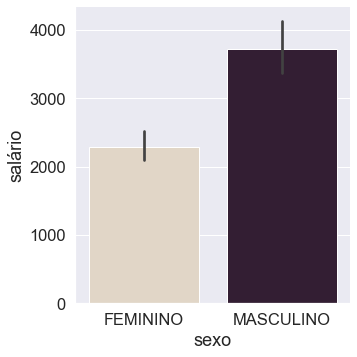

In [51]:
sns.catplot(x="sexo", y="salário",  palette="ch:.25",kind="bar", data=df)

In [52]:
df.groupby(by=['sexo','admitidos/desligados'])['salário'].mean()

sexo       admitidos/desligados
FEMININO   Admitido                2059.347168
           Desligado               2419.399170
MASCULINO  Admitido                2759.419189
           Desligado               4390.480957
Name: salário, dtype: float32

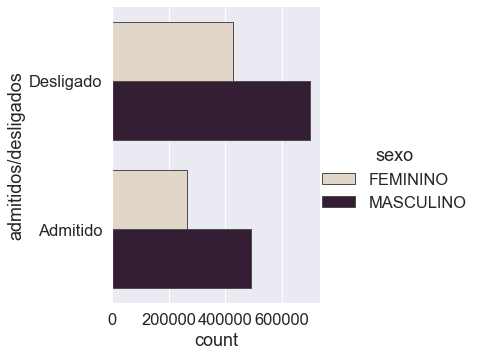

In [53]:
sns.catplot(y="admitidos/desligados", hue="sexo", kind="count",
            palette="ch:.25", edgecolor=".3",
            data=df)

##  Diferença salarial entre homens e mulheres admitidos e demitidos

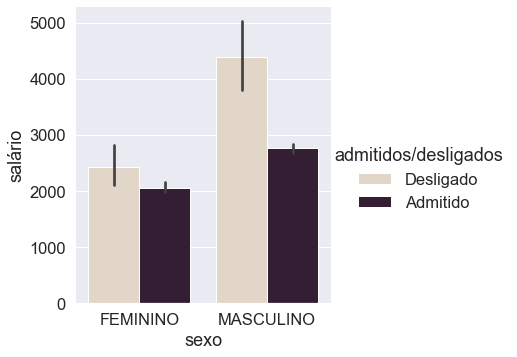

In [54]:
sns.catplot(x="sexo",palette="ch:.25", y="salário", hue="admitidos/desligados", kind="bar", data=df)